In [176]:
projectdir = "C:/Users/Arman Angaji/OneDrive - Universität zu Köln/Dokumente/Uni-Köln/Masterarbeit/Workspace/Julia_Master/MasterProject_Julia/"
using Pkg; Pkg.activate(projectdir)

using DataFrames, StatsBase, Plots, Statistics, LaTeXStrings, Interact, LsqFit, CSV, Blink, Pipe, ProgressMeter, StatsPlots, Distributed, Roots
pyplot()

try 
    Turnover
catch e
    include(projectdir*"Turnover/Turnover.jl")
    include(projectdir*"Turnover/test.jl")
    using .Turnover
end

import TumorGrowth
include(projectdir*"distribution_functions.jl")
include(projectdir*"simulated_tumors/path_format.jl")
include(projectdir*"Turnover/utility.jl")
include(projectdir*"SamplingAnalysis/plot_funcs.jl")
plot(size=(1,1))

  Activating environment at `C:\Users\Arman Angaji\OneDrive - Universität zu Köln\Dokumente\Uni-Köln\Masterarbeit\Workspace\Julia_Master\MasterProject_Julia\Project.toml`


In [32]:
cd(projectdir*"/TumorGrowth/"); run(`git branch`); cd("..")

* experimental
  master
  poissonmuts


# Load data

In [45]:
tumorinfo = dir_info_mutations(projectdir*"/simulated_tumors/2d/bulk/")
filter!(x-> x.N == 10000 && x.μ == 0.2 && x.d in 0.:0.2:0.8, tumorinfo)
for x in groupby(tumorinfo, :d)
    print("d=",first(x.d), ": ", nrow(x), ", ")
end

d=0.0: 10, d=0.2: 25, d=0.4: 32, d=0.6: 42, d=0.8: 31, 

In [56]:
filter!(r->r.N==10000 && r.ρ == Inf && r.d in 0.0:0.2:0.8 && r.μ == 0.2 && r.dim==2, tumorinfo)
tumorinfo.tumor = @showprogress pmap(TumorGrowth.data_import, tumorinfo.tumorpath)
tumorinfo.mutations = @showprogress pmap(TumorGrowth.data_import, tumorinfo.mutationspath)
;

Progress: 100%|█████████████████████████████████████████| Time: 0:01:19


# Methods

In [38]:
function bisection(f, interval, iter; precision=1e-9)
    xlow, xup = interval
    sign(f(xlow)) == sign(f(xup)) && error("no zero in interval $interval")
    any((isnan.(f.(interval)))) && error("f not defined on interval $interval")
    for i=1:iter
        xm = (xlow+xup)/2
        abs(f(xm)) < precision && return (xm, i)
        if sign(f(xm)) != sign(f(xlow))
            xup = xm
        else
            xlow = xm
        end
    end
    println(xup)
    error("no convergence within $iter steps")
end
using Distributions, NLsolve, Roots
z = nlsolve(x->cdf.(Normal(), x) .- 0.975, [1.]).zero[1]

1.9599639704623484

# Full single-cell set

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


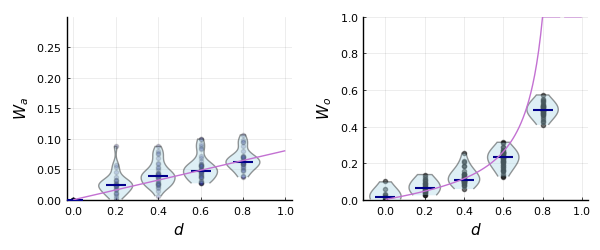

In [177]:
Nthresh = 500
ds, Wa, Wo = get_turnover(tumorinfo; Nthresh_orph=Nthresh, Nthresh_estr=Nthresh,
    tumor_sample_func = df -> df)
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh, Nthresh_estr=Nthresh, mu=0.2)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


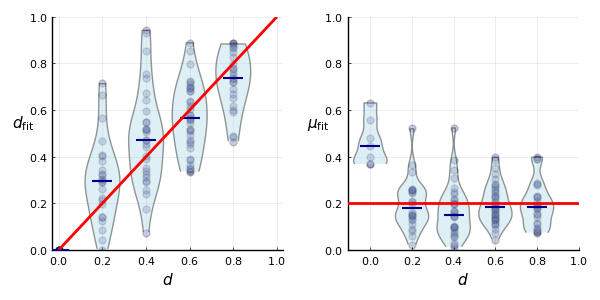

In [171]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph=Nthresh, Nthresh_estr=Nthresh, Wa, Wo)
mask = .!ismissing.(mufits)
plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


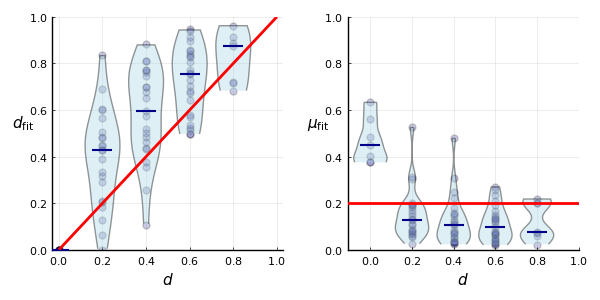

In [172]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph=10_000, Nthresh_estr=10_000, Wa, Wo)
mask = .!ismissing.(mufits)
plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


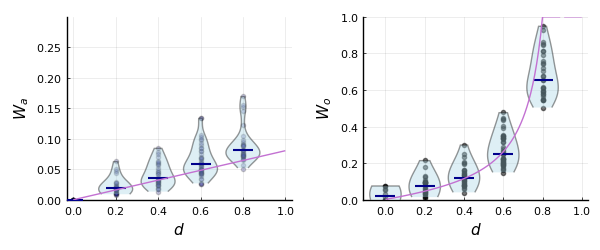

In [178]:
Nthresh_orph , Nthresh_estr = 1000, 500
ds, Wa, Wo = get_turnover(tumorinfo; useknown_N = true, Nthresh_orph, Nthresh_estr,
    tumor_sample_func = df -> df)
mask = .!(isnan.(Wo))
ds, Wa, Wo = ds[mask], Wa[mask], Wo[mask]
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh, Nthresh_estr=Nthresh, mu=0.2)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:39


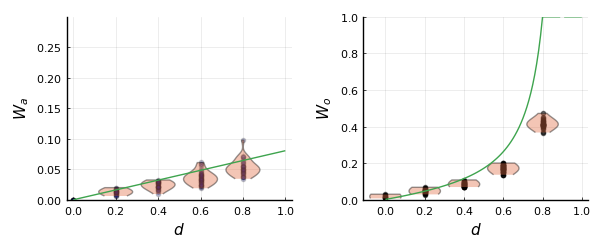

In [126]:
Nthresh_orph , Nthresh_estr = 5000, 5000
ds, Wa, Wo = get_turnover(tumorinfo; useknown_N = true, Nthresh_orph, Nthresh_estr,
    tumor_sample_func = df -> df)
mask = .!(isnan.(Wo))
ds, Wa, Wo = ds[mask], Wa[mask], Wo[mask]
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh, Nthresh_estr=Nthresh, mu=0.2)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:10


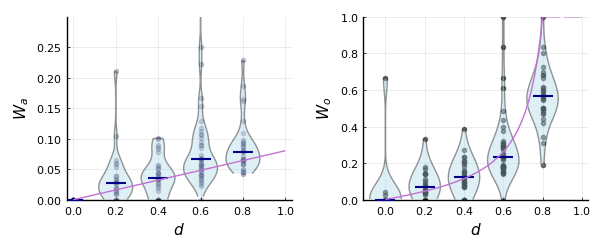

In [179]:
Nthresh_orph , Nthresh_estr = 500, 500
ds, Wa, Wo = get_turnover(tumorinfo; useknown_T = true, Nthresh_orph, Nthresh_estr,
    tumor_sample_func = df -> df)
mask = .!(isnan.(Wo))
ds, Wa, Wo = ds[mask], Wa[mask], Wo[mask]
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh, Nthresh_estr=Nthresh, mu=0.2)

Progress: 100%|█████████████████████████████████████████| Time: 0:02:37


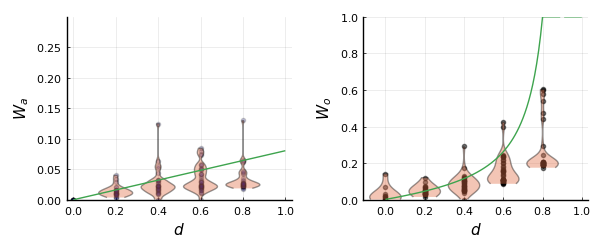

In [128]:
Nthresh_orph , Nthresh_estr = 5000, 5000
ds, Wa, Wo = get_turnover(tumorinfo; useknown_T = true, Nthresh_orph, Nthresh_estr,
    tumor_sample_func = df -> df)
mask = .!(isnan.(Wo))
ds, Wa, Wo = ds[mask], Wa[mask], Wo[mask]
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh, Nthresh_estr=Nthresh, mu=0.2)

# Spatial sampling

In [180]:
Nthresh_orph, Nthresh_estr, samplecutoff, n_samples = 500, 500, 1/3, 285

ds, Wa, Wo = get_turnover(tumorinfo; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr,
    tumor_sample_func = df -> begin
        samples, sampletumor = TumorGrowth.multi_region_sequencing(df; n=n_samples, cells_per_sample = 20)
        for row in eachrow(sampletumor)
            mask = row.frequencies .> samplecutoff
            row.mutations, row.frequencies = row.mutations[mask], row.frequencies[mask]
        end
        sampletumor
    end,
    mut_freqs_func = sampletumor_mfreqs
);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:44


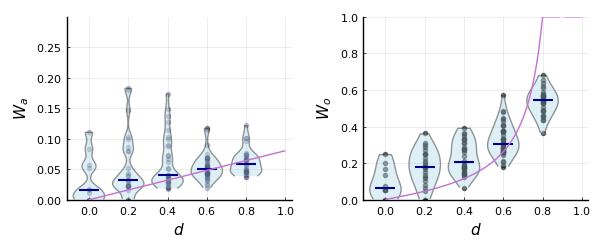

In [181]:
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, mu=0.2)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


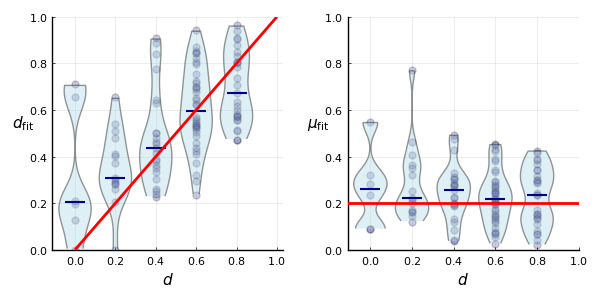

In [183]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph, Nthresh_estr, Wa, Wo)
mask = .!ismissing.(mufits)
plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2)

In [183]:
# savefig("turnover_plots/inference/inference_spatial_N500_n285_thesis.pdf")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


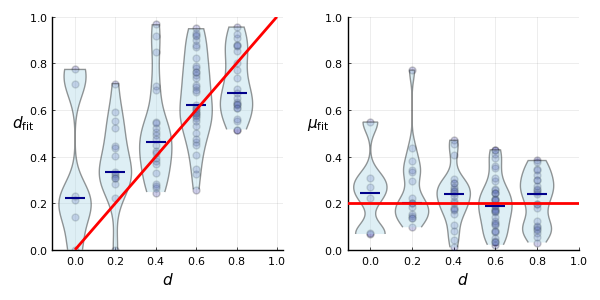

In [186]:
ds, dfits, mufits = infer_params( tumorinfo; 
    Nthresh_orph= Nthresh_orph *10_000/(n_samples*20), Nthresh_estr= Nthresh_estr *10_000/(n_samples*20), Wa, Wo)
mask = .!ismissing.(mufits)
plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2)

***known N***

In [187]:
Nthresh_orph, Nthresh_estr, samplecutoff, n_samples = 500, 500, 1/3, 285

ds, Wa, Wo = get_turnover(tumorinfo; useknown_N = true, Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr,
    tumor_sample_func = df -> begin
        samples, sampletumor = TumorGrowth.multi_region_sequencing(df; n=n_samples, cells_per_sample = 20)
        for row in eachrow(sampletumor)
            mask = row.frequencies .> samplecutoff
            row.mutations, row.frequencies = row.mutations[mask], row.frequencies[mask]
        end
        sampletumor
    end,
    mut_freqs_func = sampletumor_mfreqs
);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:44


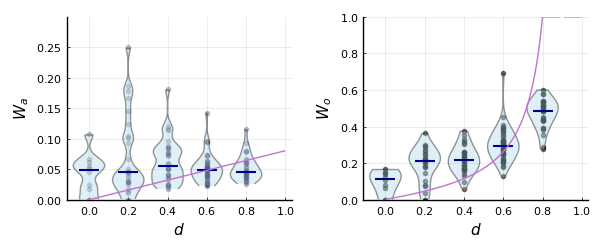

In [188]:
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, mu=0.2)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


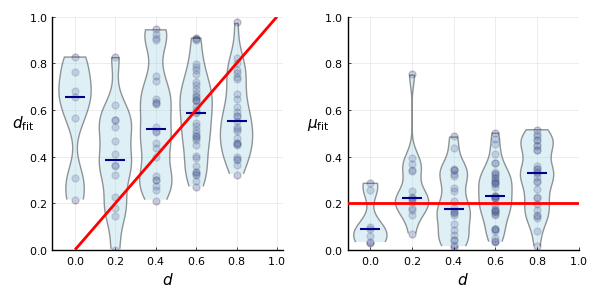

In [189]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph, Nthresh_estr, Wa, Wo)
mask = [ !ismissing(m) && !isnan(m) && !ismissing(d) && !isnan(d) for (d,m) in zip(dfits, mufits)]
plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2, size=(600,300))

In [190]:
Nthresh_orph, Nthresh_estr, samplecutoff, n_samples = 500, 500, 1/3, 285

ds, Wa, Wo = get_turnover(tumorinfo; useknown_T = true, Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr,
    tumor_sample_func = df -> begin
        samples, sampletumor = TumorGrowth.multi_region_sequencing(df; n=n_samples, cells_per_sample = 20)
        for row in eachrow(sampletumor)
            mask = row.frequencies .> samplecutoff
            row.mutations, row.frequencies = row.mutations[mask], row.frequencies[mask]
        end
        sampletumor
    end,
    mut_freqs_func = sampletumor_mfreqs
);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:44


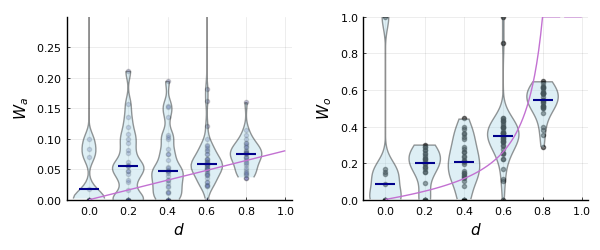

In [191]:
mask = .!isnan.(Wo)
plot_turnover_violin(ds[mask], Wa[mask], Wo[mask]; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, mu=0.2)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


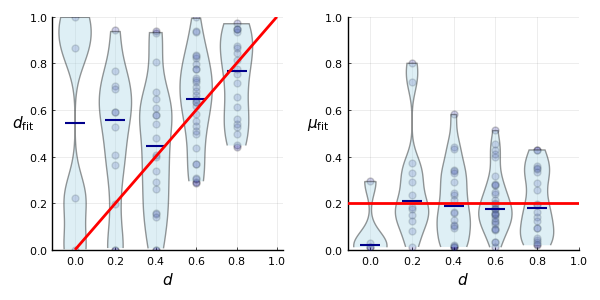

In [192]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph, Nthresh_estr, Wa, Wo)
mask = [ !ismissing(m) && !isnan(m) && !ismissing(d) && !isnan(d) for (d,m) in zip(dfits, mufits)]
plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2, size=(600,300))

In [139]:
dataset = include("turnover_data/inference_spatialdata_results.jl")[2]

(method = "solve", mu = 0.2, Nthresh = 400, samplenum = 270, samplesize = 20, sampleres = 0.3333333333333333, ds = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2  …  0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], dfits = [0.52672, 0.44055, 0.87948, 0.66572, 0.58217, 0.90282, 0.54468, 0.5639, 0.75682, 0.80784  …  0.62571, 0.75376, 0.72804, 0.83277, 0.72343, 0.85836, 0.8811, 0.51496, 0.96341, 0.82702], mufits = [0.12745, 0.24565, 0.04032, 0.09046, 0.27509, 0.03042, 0.09712, 0.19405, 0.05517, 0.08769  …  0.31778, 0.19973, 0.22541, 0.13819, 0.2077, 0.11163, 0.08802, 0.40177, 0.02575, 0.12318])

[17, 20, 35, 27]


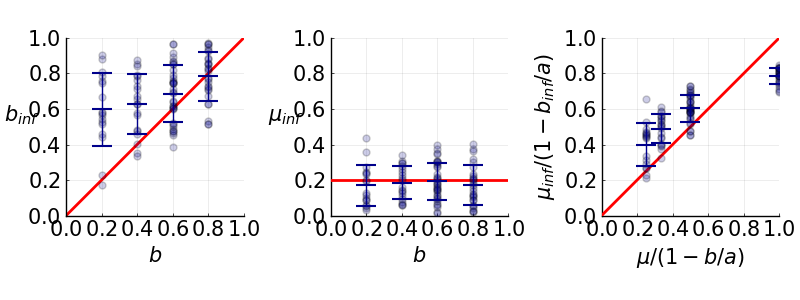

In [141]:
data = include("turnover_data/inference_spatialdata_results.jl")[2]
p = plot_series_scatter(data.ds, data.dfits, data.mufits; mu=data.mu, size=(800,300))